# Introduction
#### Source : Kaggle
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged as ham (legitimate) or spam.

The csv file of the data contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

## Loading and preprocessing data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv', encoding = 'latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#dropping useless columns
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True, axis = 1)

In [6]:
#renaming columns
df.rename(columns = {'v1':'label', 'v2':'message'}, inplace = True)

In [7]:
#setting label as 0 for ham and 1 for soam
dummies = pd.get_dummies(df['label']).iloc[:, 1]

In [8]:
df['label'] = dummies

In [9]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
0        4825   4516                             Sorry, I'll call later   30
1         747    653  Please call our customer service representativ...    4

In [11]:
#dropping duplicate data entries
df.drop_duplicates(inplace = True)

In [12]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
0        4516   4516           Am okay. Will soon be over. All the best    1
1         653    653  +123 Congratulations - in this week's competit...    1

In [13]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.reset_index(inplace = True)

In [15]:
df.head()

,index,label,message
0,0,0,"Go until jurong point, crazy.. Available only ..."
1,1,0,Ok lar... Joking wif u oni...
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,0,U dun say so early hor... U c already then say...
4,4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.drop('index', inplace = True, axis = 1)

In [17]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Applying NLP techniques

In [18]:
#importing required libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lem = WordNetLemmatizer()

In [19]:
corpus = []
for i in range(df.shape[0]):
    text = re.sub('[^a-zA-Z]',' ', df['message'][i]) #removing all other characters except english alphabets
    text = text.lower() #lowering the text
    text = nltk.word_tokenize(text) #word tokenization and getting list of tokenized words
    
    text = [lem.lemmatize(word) for word in text if not word in stopwords.words('english')] #lemmatization and removing stopwords
    text = ' '.join(text)  #joining words into cleaned message
    corpus.append(text) #storing each message in a list
    

In [20]:
#extracting length of each message
length = []
for i in range(df.shape[0]):
    length.append(len(df['message'][i].split()))
    

In [21]:
#adding cleaned messages and length of messages into the dataframe
df['cleaned_message'] = corpus
df['length'] = length

In [22]:
df.head()

,label,message,cleaned_message,length
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,20
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,28
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say,11
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though,13


## EDA

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'number of ham messages')

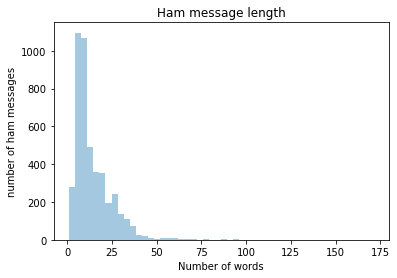

In [24]:
#Plotting the histogram of length of messages that are HAM
sns.distplot(a=df[df['label']==0].length, kde=False)
plt.title('Ham message length')
plt.xlabel('Number of words')
plt.ylabel('number of ham messages')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'number of spam messages')

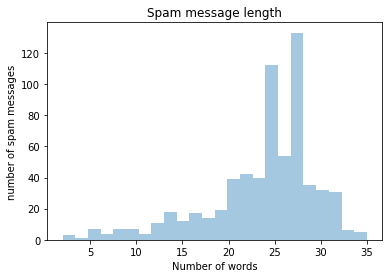

In [25]:
#Plotting the histogram of length of messages that are SPAM
sns.distplot(a=df[df['label']==1].length, kde=False)
plt.title('Spam message length')
plt.xlabel('Number of words')
plt.ylabel('number of spam messages')

([<matplotlib.axis.XTick at 0x1e794001760>,
 [Text(0, 0, 'ham'), Text(1, 0, 'spam')])

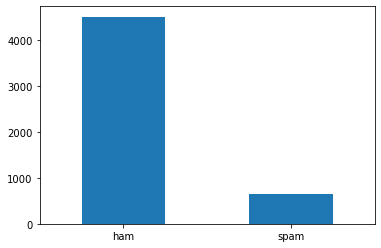

In [26]:
#plotting the bar graph for number of spam and ham messages
df["label"].value_counts().plot(kind="bar",figsize=(6,4))
plt.xticks([0,1],['ham', 'spam'], rotation = 0)

In [27]:
#importing libraries for count vectorization and saving count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pickle
cv = CountVectorizer(max_features=5000)


In [28]:
#applying count vectorizer to the data 
countvector = cv.fit_transform(corpus).toarray()
#saving count vectorizer for later use
pickle.dump(cv, open("cv.pkl", "wb"))

In [29]:
#converting to a data frame

df2 = pd.DataFrame(countvector, columns = np.arange(len(countvector[0])))

In [30]:
df2 = pd.DataFrame(countvector, columns = np.arange(len(countvector[0])))

In [31]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#concatinating the two dataframes
df3 = pd.concat([df, df2], axis=1)

In [33]:
df3.head()

,label,message,cleaned_message,length,0,1,2,3,4,5,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,28,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#dropping the columns that are not neccessary for model building 
final_df = df3.drop(['message', 'cleaned_message'], axis = 1)

In [35]:
final_df.head()

,label,length,0,1,2,3,4,5,6,7,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model builing 

In [36]:
X = final_df.iloc[:, 1:] #features

In [37]:
y = final_df['label'] #labels

In [38]:
#splitting data into train and test data
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [40]:
#importing various models for training
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [41]:
#creating model objects
RF = RandomForestClassifier()
NN = KNeighborsClassifier()
SVM = SVC()
GNB = GaussianNB()
DT = DecisionTreeClassifier()
MNB = MultinomialNB()

In [42]:
#training and comparing models
models = [RF, NN, SVM, GNB, DT, MNB]
for i, model in enumerate(models):
    trained_model = model.fit(X_train, y_train)
    y_pred = trained_model.predict(X_test)
    print(str(models[i]))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_pred, y_test))

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       899
           1       0.99      0.78      0.87       135

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034

[[898  30]
 [  1 105]]
KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       899
           1       1.00      0.50      0.66       135

    accuracy                           0.93      1034
   macro avg       0.96      0.75      0.81      1034
weighted avg       0.94      0.93      0.92      1034

[[899  68]
 [  0  67]]
SVC()
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       899
           1       1.00      0.59      0.74       135

    accuracy                           0.95      1034
   macro avg       0.97     

In [55]:
#choosing Multinomial Naive Bayeds Model based on accuray and precision
final_model = MNB.fit(X_train, y_train)

In [56]:
#saving the model
pickle.dump(final_model, open("spam_ham.pkl", "wb"))

## Testing on a new message

In [57]:
#loading model and count vectorizer
model = pickle.load(open("spam_ham.pkl", "rb"))

cv = pickle.load(open("cv.pkl", "rb"))


In [ ]:
#testing on a new message
new_message = str(input('Enter a message: '))
new_length = len(new_message.split())
new_message = re.sub('[^a-zA-Z]',' ', new_message)
new_message= new_message.lower()
new_message = nltk.word_tokenize(new_message)
new_message = [lem.lemmatize(word) for word in new_message if not word in stopwords.words('english')]
print(new_message)
new_message = ' '.join(new_message)
new_message = [new_message]
new_countvector = cv.transform(new_message).toarray()

new_df = pd.DataFrame(new_countvector, columns = np.arange(len(new_countvector[0])))
new_df.insert(loc = 0, column = 'label', value = new_length)
pred = model.predict(new_df)
if pred[0]==0:
    print('It is not spam')
else:
    print('It is spam!')

